In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Forward Difference method

In [9]:
def forward_derivative(f, x, h):
    """ Forward difference method

    Args:
        f (function): Any mathematical function 
        x (float32): Input
        h (float32): Step Size
    """
    
    return (f(x+h) - f(x))/ h

C:\Users\disha\AppData\Local\Temp\ipykernel_8688\433543559.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return (f(x+h) - f(x))/ h


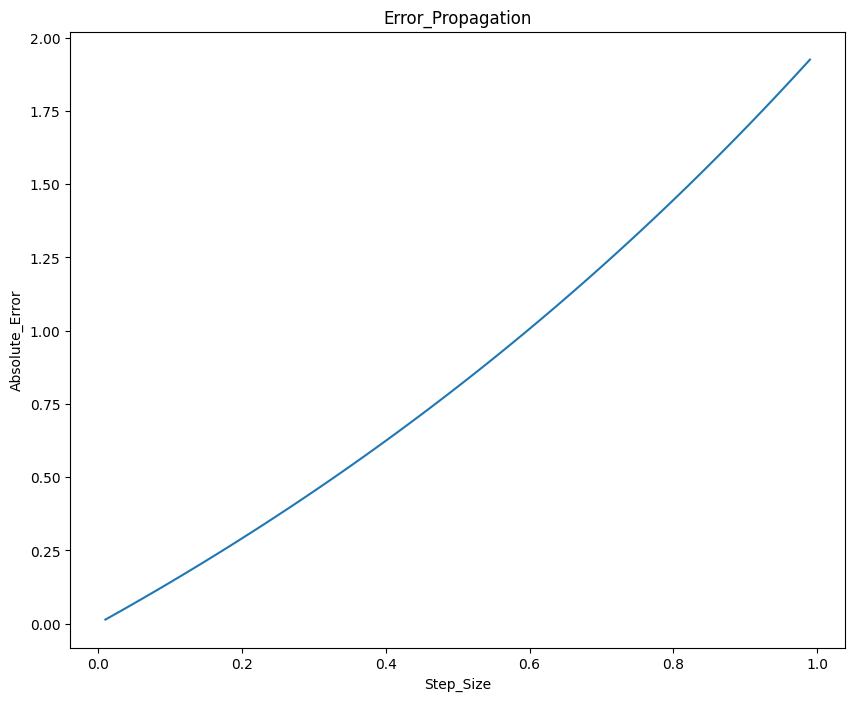

In [ ]:
h = np.arange(0, 1, 0.01)
error = []
for i in h:
    a = abs(np.exp(1) - forward_derivative(lambda x: np.exp(x), 1, i))
    error.append(a)
    
plt.figure(figsize= (10, 8))
plt.plot(h, error)
plt.xlabel("Step_Size")
plt.ylabel("Absolute_Error")
plt.title("Error_Propagation")
plt.show()


### Almost linear in shape thus --- O(h) error order

In [16]:
### Same for Backward difference (Home-work)
def central_derivative(f, x, h):
    """ Central difference method

    Args:
        f (function): Any mathematical function 
        x (float32): Input
        h (float32): Step Size
    """
    
    return (f(x+h) - f(x-h))/ 2*h

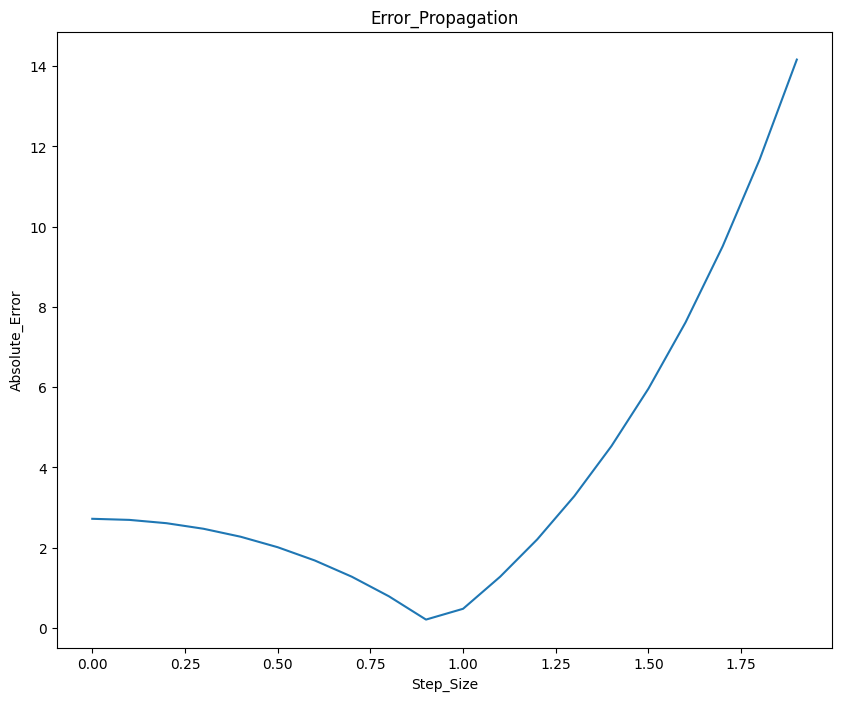

Optimal step size (h) for minimum error: 0.9
Minimum absolute error: 0.20695624256741585


In [ ]:
h = np.arange(0, 2, 0.1)
error = []
for i in h:
    a = abs(np.exp(1) - central_derivative(lambda x: np.exp(x), 1, i))
    error.append(a)

min_error = min(error)
optimal_h = h[error.index(min_error)]

plt.figure(figsize= (10, 8))
plt.plot(h, error)
plt.xlabel("Step_Size")
plt.ylabel("Absolute_Error")
plt.title("Error_Propagation")
plt.show()

print(f"Optimal step size (h) for minimum error: {optimal_h}")
print(f"Minimum absolute error: {min_error}")

## Almost quadratic in nature O(H^2)



### Nth Derivative

In [25]:
## (this using forward difference method)

def nforwardderivative(f, x, h, n):
    """ Computes nth derivative of function

    Args:
        f (function): _description_
        x (float32): Input
        h (float32): step size
        n (int): order
    """
    t = 0
    for k in range(n+1):
        t = t + (-1)**(k+n) * math.factorial(n) / (math.factorial(k) * math.factorial(n-k)) * f(x + k*h)
    
    return t / h**n  
    

C:\Users\disha\AppData\Local\Temp\ipykernel_8688\3884113147.py:16: RuntimeWarning: invalid value encountered in scalar divide
  return t / h**n


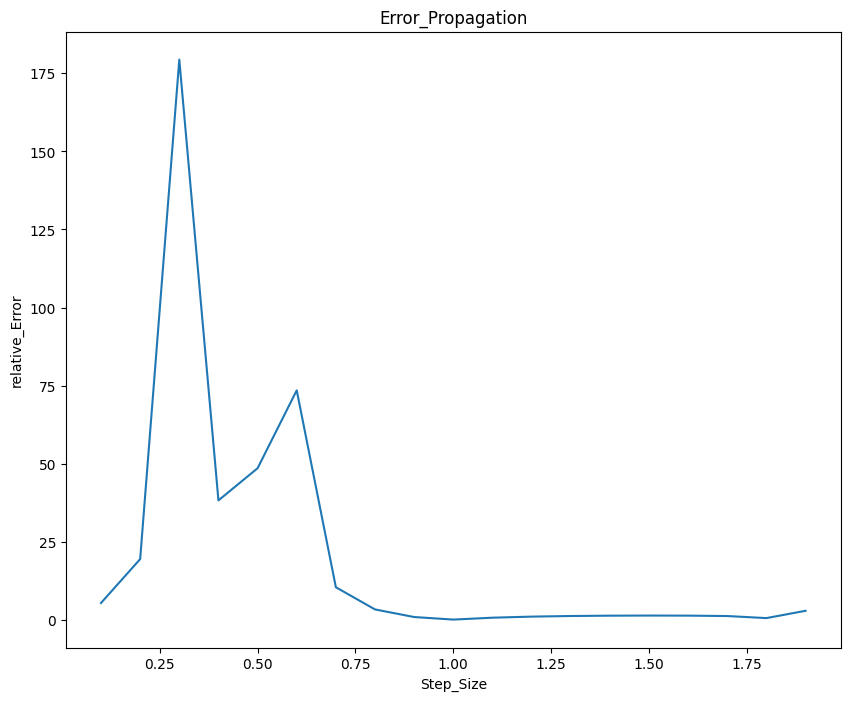

Optimal step size (h) for minimum error: 0.0
Minimum absolute error: nan


In [ ]:
h = np.arange(0, 2, 0.1)
error = []
for i in h:
    a = abs((2*np.cos(1) - 2*1 + (1/np.cos(1))**2) - nforwardderivative(lambda x: 2*np.sin(x) - x**2 + np.tan(x), 1, i, 2)) / (2*np.cos(1) - 2*1 + (1/np.cos(1))**2)
    error.append(a)

min_error = min(error)
optimal_h = h[error.index(min_error)]

plt.figure(figsize= (10, 8))
plt.plot(h, error)
plt.xlabel("Step_Size")
plt.ylabel("relative_Error")
plt.title("Error_Propagation")
plt.show()

print(f"Optimal step size (h) for minimum error: {optimal_h}")
print(f"Minimum absolute error: {min_error}")





C:\Users\disha\AppData\Local\Temp\ipykernel_8688\3002653766.py:3: RuntimeWarning: invalid value encountered in scalar divide
  return (f(x+h) -2*f(x) + f(x-h)) / h**2


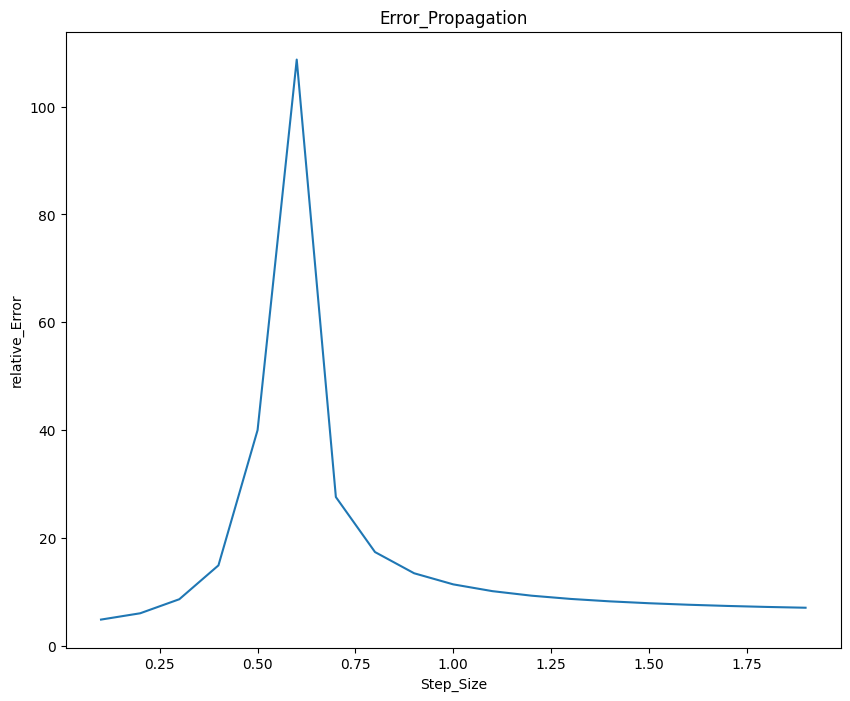

Optimal step size (h) for minimum error: 0.0
Minimum absolute error: nan


In [ ]:
## 2nd order derivative using central difference
def n2centraldifference(f, x, h):
    return (f(x+h) -2*f(x) + f(x-h)) / h**2

h = np.arange(0, 2, 0.1)
error = []
for i in h:
    a = abs((2*np.cos(1) - 2*1 + (1/np.cos(1))**2) - n2centraldifference(lambda x: 2*np.sin(x) - x**2 + np.tan(x), 1, i))
    error.append(a)

min_error = min(error)
optimal_h = h[error.index(min_error)]

plt.figure(figsize= (10, 8))
plt.plot(h, error)
plt.xlabel("Step_Size")
plt.ylabel("relative_Error")
plt.title("Error_Propagation")
plt.show()

print(f"Optimal step size (h) for minimum error: {optimal_h}")
print(f"Minimum absolute error: {min_error}")

## Almost quadratic in nature O(H^2)



### Taylor expansion of general function

In [30]:
def taylor(f, x, x0, nmax, h):
    """Taylor expansion of function about x0

    Args:
        f (function): mathematical function
        x (float32): Input
        x0 (float32): Central Point
        nmax (int): maximum number of expanding terms
        h (float32): Step Size
    """
    
    t = 0
    for n in range(nmax + 1):
        t = t + nforwardderivative(f, x, h, n) * (x-x0)**n / math.factorial(n)
        
    return t

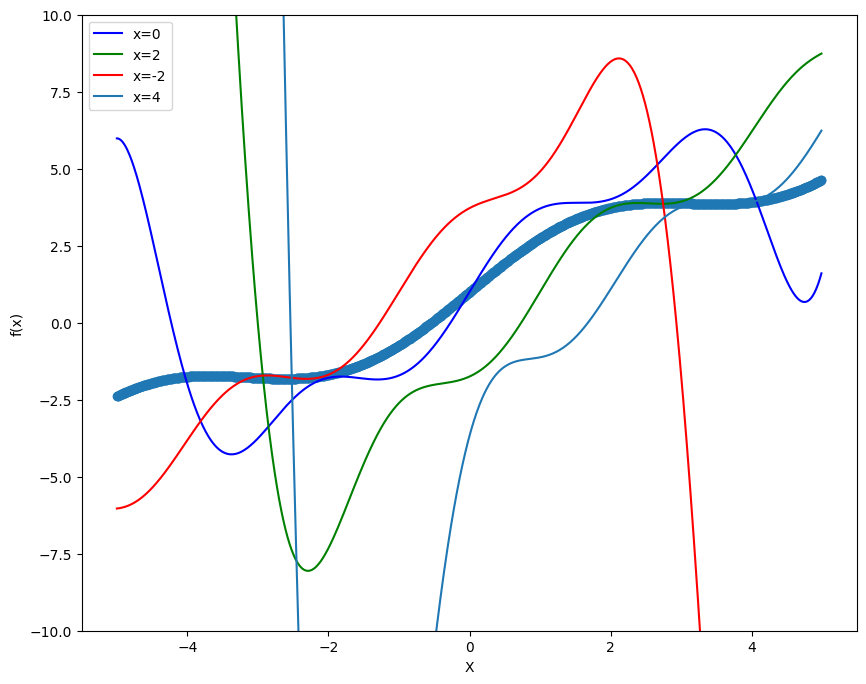

In [45]:
x = np.arange(-5, 5, 0.01)
h = 0.05
nmax= 5
plt.figure(figsize= (10, 8))
plt.scatter(x, np.sin(x) + x + np.exp(-0.1*x))
plt.plot(x, taylor(lambda x: np.sin(x) + x + np.exp(-0.1*x), x, 0, nmax, h), 'blue', label= 'x=0')
plt.plot(x, taylor(lambda x: np.sin(x) + x + np.exp(-0.1*x), x, 2, nmax, h), 'green', label= 'x=2')
plt.plot(x, taylor(lambda x: np.sin(x) + x + np.exp(-0.1*x), x, -2, nmax, h), 'red', label= 'x=-2')
plt.plot(x, taylor(lambda x: np.sin(x) + x + np.exp(-0.1*x), x, 4, nmax, h), '', label= 'x=4')
plt.xlabel('X')
plt.ylabel("f(x)")
plt.ylim(-10, 10)
plt.legend()
plt.show()
